Title:
 Restaurant Revenue Prediction Using Supervised Machine Learning

Problem Statement:
The objective of this project is to build a machine learning model that predicts restaurant revenue based on factors such as seating capacity, meal price, marketing budget, chef experience, social media reach, reviews, service quality, and reservation patterns. Accurate revenue prediction helps restaurant owners optimize pricing, marketing strategies, and operational efficiency.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
      

In [6]:
df = pd.read_csv("restaurant_data.csv")

In [7]:
df.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [9]:
print(df.isnull().sum())

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64


In [10]:

df.drop("Name", axis=1, inplace=True, errors="ignore")


In [11]:

df = pd.get_dummies(df, drop_first=True)

In [12]:

numeric_df = df.select_dtypes(include=['int64', 'float64'])


Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | 
          (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Outliers removed successfully!")


Outliers removed successfully!


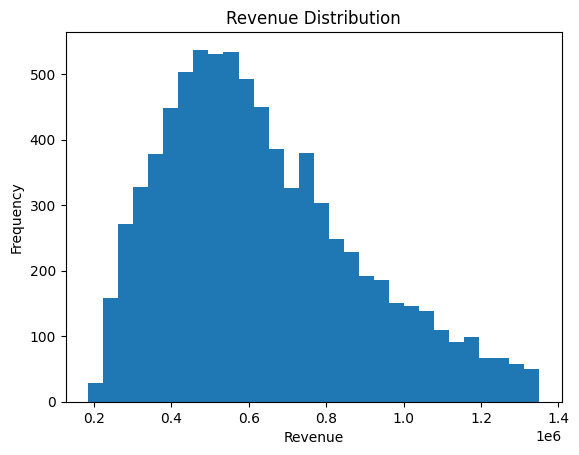

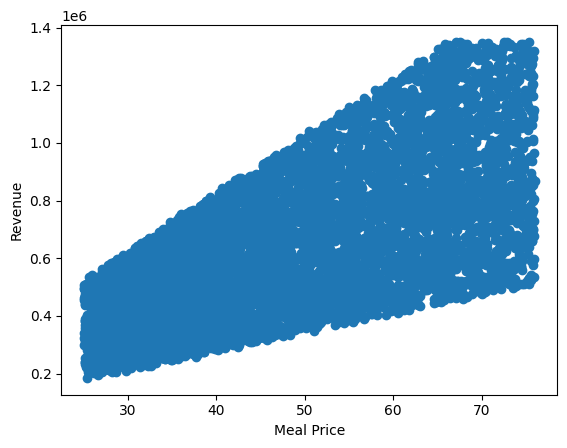

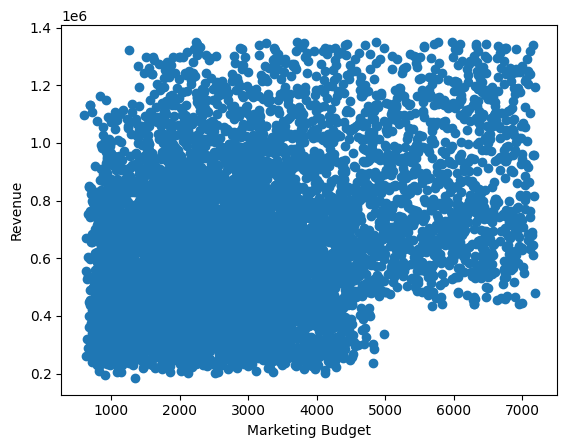

In [13]:

plt.hist(df["Revenue"], bins=30)
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()


plt.scatter(df["Average Meal Price"], df["Revenue"])
plt.xlabel("Meal Price")
plt.ylabel("Revenue")
plt.show()


plt.scatter(df["Marketing Budget"], df["Revenue"])
plt.xlabel("Marketing Budget")
plt.ylabel("Revenue")
plt.show()

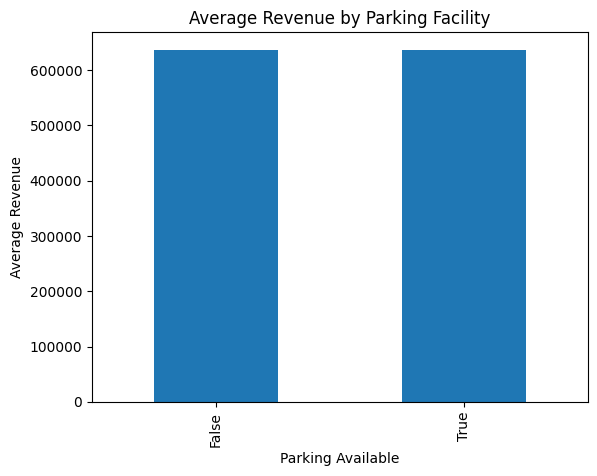

In [14]:
parking_cols = [col for col in df.columns if "Parking Availability" in col]

avg_rev = df.groupby(parking_cols[0])["Revenue"].mean()

plt.figure()
avg_rev.plot(kind="bar")
plt.xlabel("Parking Available")
plt.ylabel("Average Revenue")
plt.title("Average Revenue by Parking Facility")
plt.show()



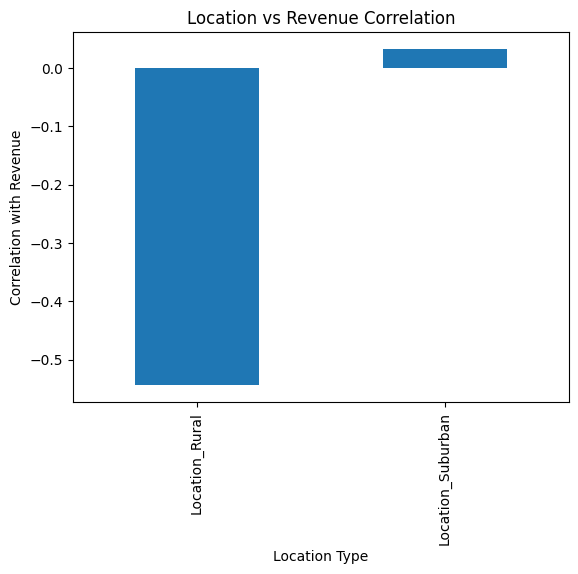

In [15]:
location_cols = [col for col in df.columns if "Location_" in col]
location_rev = df[location_cols + ["Revenue"]].corr()["Revenue"][:-1]

plt.figure()
location_rev.plot(kind="bar")
plt.xlabel("Location Type")
plt.ylabel("Correlation with Revenue")
plt.title("Location vs Revenue Correlation")
plt.show()


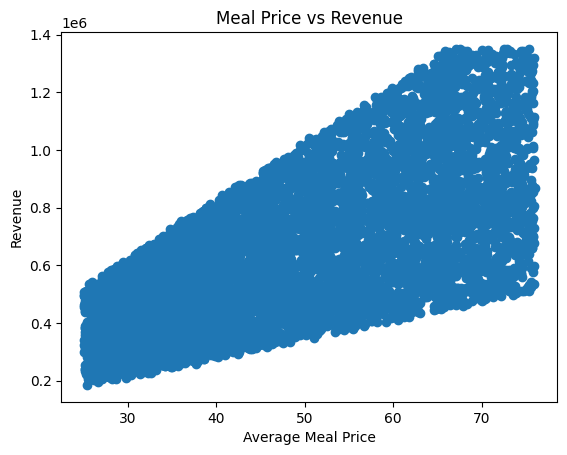

In [16]:
plt.figure()
plt.scatter(df["Average Meal Price"], df["Revenue"])
plt.xlabel("Average Meal Price")
plt.ylabel("Revenue")
plt.title("Meal Price vs Revenue")
plt.show()


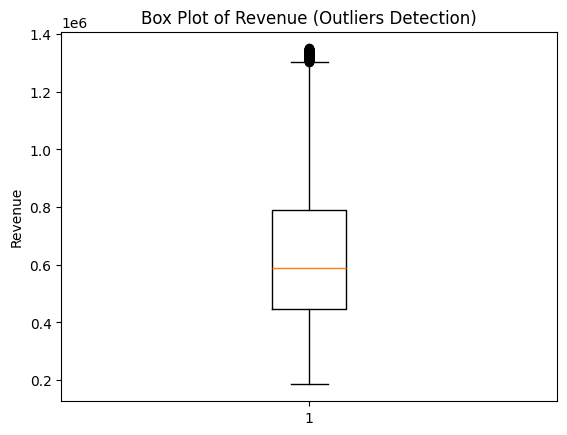

In [17]:
plt.figure()
plt.boxplot(df["Revenue"])
plt.ylabel("Revenue")
plt.title("Box Plot of Revenue (Outliers Detection)")
plt.show()


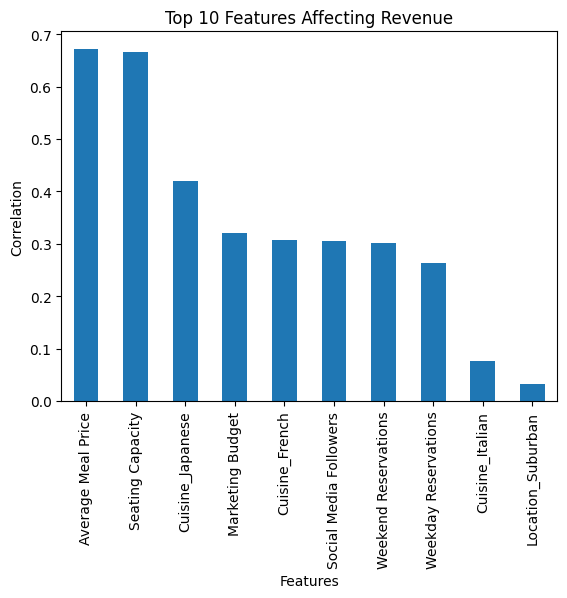

In [18]:
corr = df.corr()["Revenue"].sort_values(ascending=False)[1:11]

plt.figure()
corr.plot(kind="bar")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.title("Top 10 Features Affecting Revenue")
plt.show()


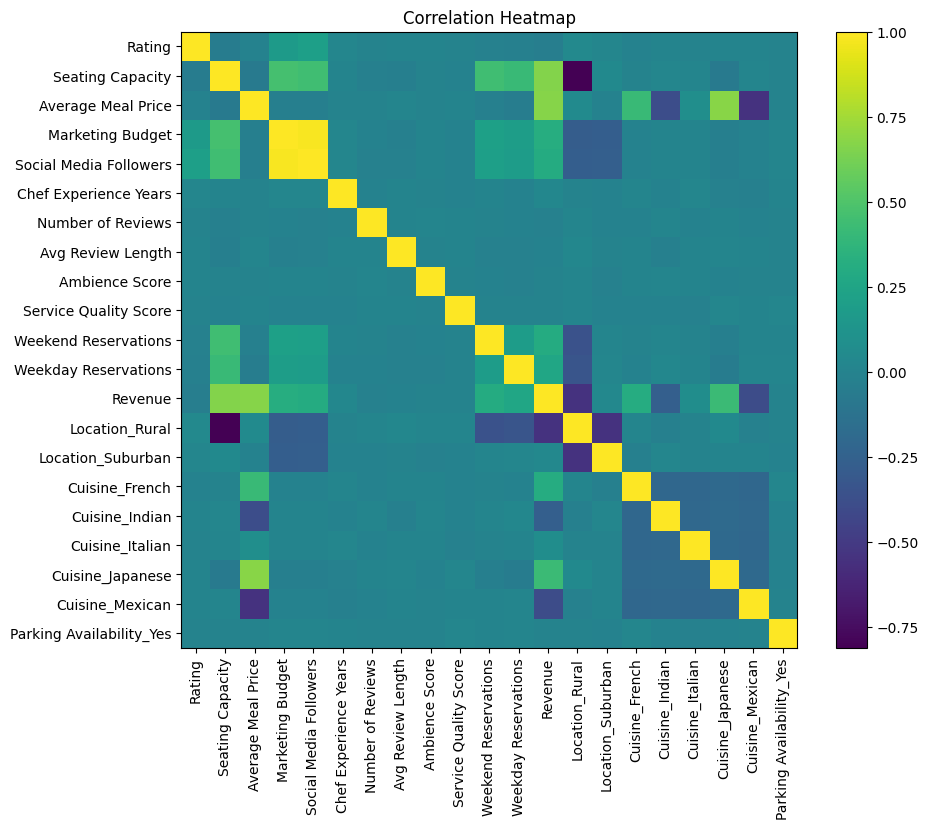

In [19]:
corr_matrix = df.corr()

plt.figure(figsize=(10,8))
plt.imshow(corr_matrix)
plt.colorbar()
plt.title("Correlation Heatmap")

ticks = np.arange(len(corr_matrix.columns))
plt.xticks(ticks, corr_matrix.columns, rotation=90)
plt.yticks(ticks, corr_matrix.columns)

plt.show()


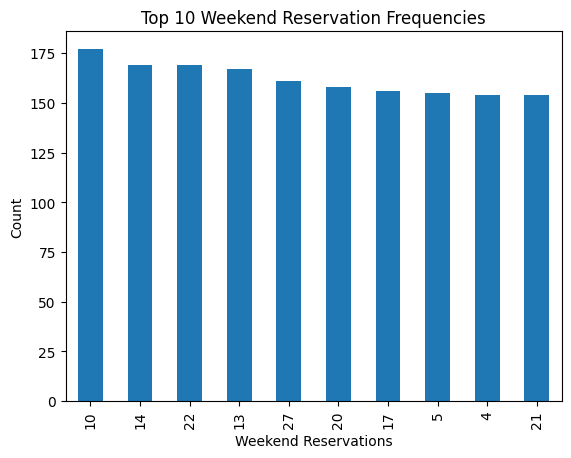

In [20]:
counts = df["Weekend Reservations"].value_counts().head(10)

plt.figure()
counts.plot(kind="bar")
plt.xlabel("Weekend Reservations")
plt.ylabel("Count")
plt.title("Top 10 Weekend Reservation Frequencies")
plt.show()


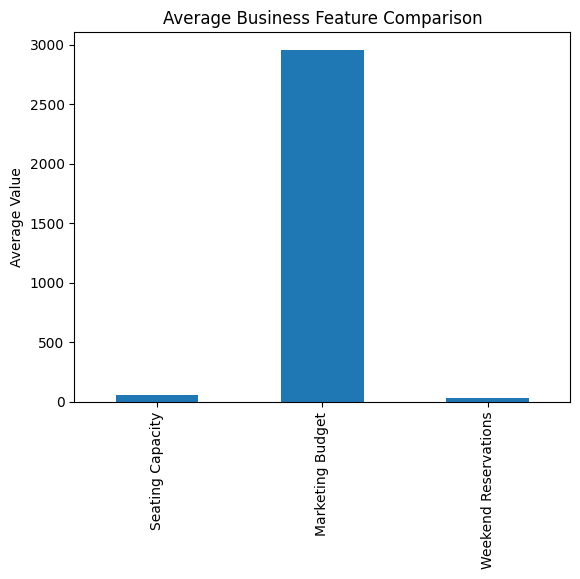

In [21]:
features = ["Seating Capacity", "Marketing Budget", "Weekend Reservations"]

means = df[features].mean()

plt.figure()
means.plot(kind="bar")
plt.ylabel("Average Value")
plt.title("Average Business Feature Comparison")
plt.show()


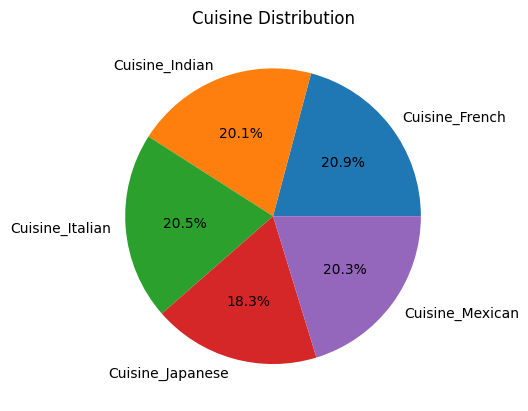

In [22]:
cuisine_cols = [col for col in df.columns if "Cuisine_" in col]


cuisine_count = df[cuisine_cols].sum()

plt.figure()
plt.pie(cuisine_count, labels=cuisine_count.index, autopct='%1.1f%%')
plt.title("Cuisine Distribution")
plt.show()




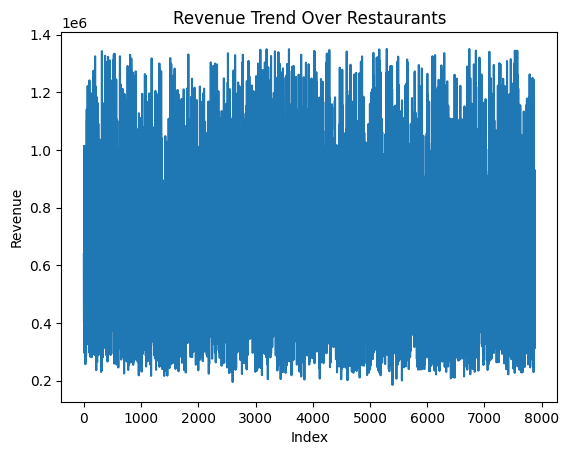

In [23]:
plt.figure()
plt.plot(df["Revenue"].reset_index(drop=True))
plt.xlabel("Index")
plt.ylabel("Revenue")
plt.title("Revenue Trend Over Restaurants")
plt.show()


In [24]:

df.describe()


correlation = df.corr()["Revenue"].sort_values(ascending=False)
print(correlation)


Revenue                     1.000000
Average Meal Price          0.671728
Seating Capacity            0.665471
Cuisine_Japanese            0.420518
Marketing Budget            0.319608
Cuisine_French              0.307339
Social Media Followers      0.304600
Weekend Reservations        0.301673
Weekday Reservations        0.263448
Cuisine_Italian             0.077184
Location_Suburban           0.032447
Chef Experience Years       0.026867
Parking Availability_Yes    0.002137
Service Quality Score       0.001063
Ambience Score             -0.003515
Avg Review Length          -0.011092
Number of Reviews          -0.015242
Rating                     -0.034365
Cuisine_Indian             -0.261174
Cuisine_Mexican            -0.387123
Location_Rural             -0.543546
Name: Revenue, dtype: float64


In [25]:
X = df.drop("Revenue", axis=1)
y = df["Revenue"]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression R2: 0.9569094984290236
Linear Regression RMSE: 51695.051902544605


In [29]:

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest R2: 0.9989575006759434
Random Forest RMSE: 8040.741347862297


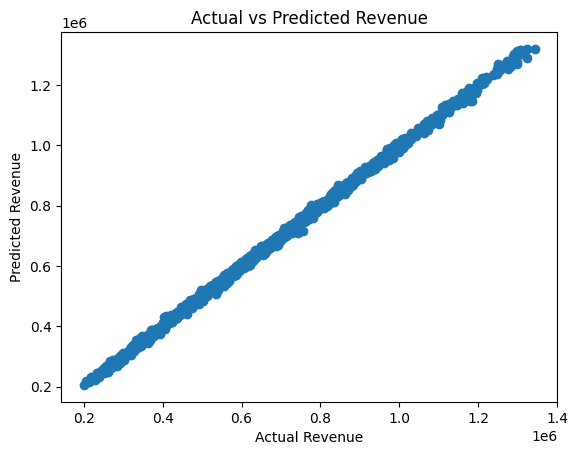

In [30]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.show()


In [32]:
import pickle
pickle.dump(rf, open("model.pkl", "wb"))


In [33]:
import os
os.listdir()


['.ipynb_checkpoints',
 '50_startup.ipynb',
 '50_Startups.csv',
 '50_Startups.ipynb',
 'CA2project.ipynb',
 'cleaned_customer_data.csv',
 'Data preprocessing.ipynb',
 'Data.csv',
 'decisiontree.ipynb',
 'diabetes.csv',
 'irisLogisticRegression.ipynb',
 'LogisticRegression.ipynb',
 'model.pkl',
 'Multiple regression.ipynb',
 'naivebayes.ipynb',
 'polynomialRegression.ipynb',
 'practicenaivebayes.ipynb',
 'RandomForest.ipynb',
 'restaurant_data.csv',
 'Result.csv',
 'Resultdata.ipynb',
 'SVCmodel.ipynb',
 'Unit2.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'Untitled3.ipynb',
 '[knn]oniris.ipynb']